## 3-6. 프로젝트: 고양이 수염 스티커 만들기


### Step 2. 얼굴 검출 & 랜드마크 검출 하기
-오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [1]:
# load packages

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


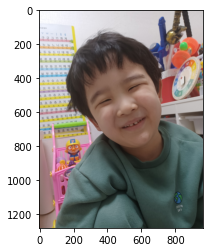

In [2]:
# load an image to use
img_path = os.getenv("HOME") + "/aiffel/camera_sticker/project_data/my_image.png"
original_bgr = cv2.imread(img_path)
copy_bgr = original_bgr.copy()

# BGR to RGB
original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
copy_rgb = cv2.cvtColor(copy_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(copy_rgb)
plt.show()

In [3]:
# create a detector
detector_hog = dlib.get_frontal_face_detector()
detector_hog

In [4]:
# face detection and get rectangles
rects = detector_hog(copy_rgb, 1)
rects

rectangles[[(297, 348) (759, 811)]]

In [5]:
# face detection and get rectangles
# test with pyramid number given 2
rects_2 = detector_hog(copy_rgb, 2)
rects_2

rectangles[[(300, 390) (699, 789)]]

In [6]:
# face detection and get rectangles
# test with pyramid number given 3
rects_3 = detector_hog(copy_rgb, 3)
rects_3

rectangles[[(311, 358) (725, 772)]]

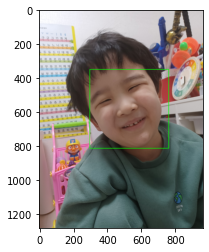

In [7]:
# draw a rectangle
for rect in rects:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()
    
    cv2.rectangle(copy_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(copy_rgb)
plt.show()

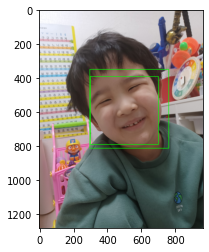

In [8]:
# draw a rectangle
# test with rects_2
for rect in rects_2:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()
    
    cv2.rectangle(copy_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(copy_rgb)
plt.show()

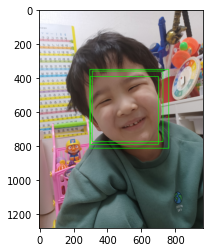

In [9]:
# draw a rectangle
# test with rects_3
for rect in rects_3:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()
    
    cv2.rectangle(copy_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(copy_rgb)
plt.show()

> dlib.get_frontal_face_detector() 객체 생성 후object detection을 할 때 upsample_num_times 따로 주면 어떻게 되는지 실험해봄.  
upsample 관한 직관적인 이해를 얻기를 희망했지만 실패함...


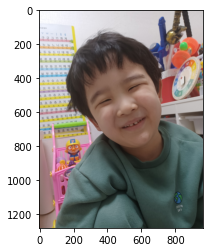

In [10]:
# create a new copy
new_copy_rgb = original_rgb.copy()

plt.imshow(new_copy_rgb)
plt.show()

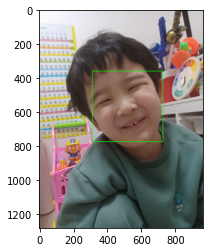

In [11]:
# apply the third one
# draw a rectangle
for rect in rects_3:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()
    
    cv2.rectangle(new_copy_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(new_copy_rgb)
plt.show()

In [12]:
# load landmark model

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [13]:
# create landmarks
list_landmarks = []

for rect in rects:
    # get landmarks from the bounding box
    points = landmark_predictor(new_copy_rgb, rect)
    
    # get x, y coordinates from all points and group them in tuples
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks))
print(len(list_landmarks[0])) # note the points are in the inner list


1
68


### Step 3. 스티커 적용 위치 확인하기
- 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

In [14]:
list_landmarks

[[(300, 603),
  (324, 646),
  (351, 685),
  (379, 725),
  (415, 756),
  (460, 782),
  (511, 797),
  (566, 806),
  (619, 793),
  (662, 762),
  (691, 720),
  (712, 673),
  (726, 622),
  (724, 568),
  (711, 513),
  (693, 462),
  (672, 413),
  (301, 549),
  (311, 510),
  (340, 482),
  (379, 465),
  (422, 462),
  (466, 435),
  (497, 406),
  (537, 389),
  (581, 384),
  (621, 399),
  (464, 489),
  (477, 520),
  (491, 549),
  (505, 581),
  (477, 626),
  (502, 623),
  (527, 619),
  (548, 602),
  (566, 585),
  (355, 555),
  (369, 544),
  (388, 530),
  (418, 524),
  (399, 535),
  (379, 547),
  (529, 473),
  (542, 458),
  (562, 448),
  (592, 439),
  (571, 449),
  (552, 461),
  (478, 699),
  (496, 677),
  (520, 656),
  (544, 651),
  (560, 637),
  (594, 629),
  (633, 626),
  (616, 662),
  (593, 687),
  (573, 700),
  (549, 708),
  (516, 711),
  (490, 694),
  (528, 673),
  (551, 666),
  (569, 654),
  (622, 632),
  (578, 668),
  (559, 680),
  (536, 687)]]

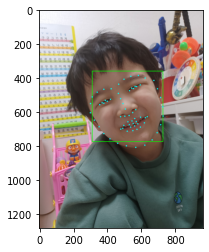

In [15]:
# draw landmarks on the image

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(new_copy_rgb, point, 1, (0, 255, 255), 5)

plt.imshow(new_copy_rgb)
plt.show()

x, y coordinates to get
- 1) the whole image
- 2) bounding box
- 3) center of the sticker(current left top)
- 4) to-be left top by calculation


In [16]:
# index 51 is chosen for the centre of the sticker
# get x, y coordinates from the image

print('the whole image shape:', new_copy_rgb.shape)
print('bounding box lt and rb:', rects[0])
print('current left top & index 51:', list_landmarks[0][51])

# bounding box width 1/4만큼만 x축 왼쪽으로 보내고
# boudning box height 1/7만큼만 y축 위로 보내면 될듯
for rect, landmark in zip(rects, list_landmarks):
    x = landmark[51][0] - rect.width()//4
    y = landmark[51][1] - rect.height()//7

    to_be_left_top = (x, y)

print('to be left top :', to_be_left_top)    

    
    

the whole image shape: (1280, 960, 3)
bounding box lt and rb: [(297, 348) (759, 811)]
current left top & index 51: (544, 651)
to be left top : (429, 585)


### Step 4. 스티커 적용하기

- (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

- (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

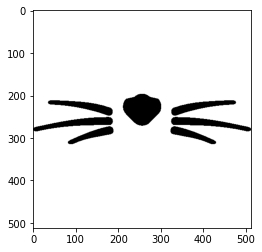

(170, 512, 3)

In [17]:
# load sticker
sticker_path = os.getenv("HOME") + "/aiffel/camera_sticker/project_data/cat_beard.png"
sticker_original = cv2.imread(sticker_path)

plt.imshow(sticker_original)
plt.show()

sticker_original.shape
sticker_cropped = sticker_original[sticker_original.shape[0]//3:sticker_original.shape[0]//3*2,:,:]
sticker_cropped.shape

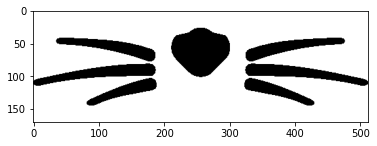

In [18]:
plt.imshow(sticker_cropped)
plt.show()

In [19]:
# resize하기
# resize할 width는 bounding box width의 3/4
# resize할 height은 bounding box의 1/4
for rect, landmark in zip(rects, list_landmarks):
    w = rect.width()//4 * 3
    h = rect.height()//4 
sticker_resized = cv2.resize(sticker_cropped, (w, h))
sticker_resized.shape

(116, 345, 3)

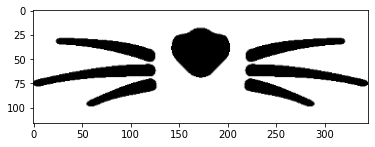

In [20]:
plt.imshow(sticker_resized)
plt.show()

In [21]:
# 스티커 위치 가능 여부 확인
if original_rgb.shape[0] > to_be_left_top[0] + sticker_resized.shape[0]:
    print(original_rgb.shape[0])
    print(to_be_left_top[0] + sticker_resized.shape[0])
    print('x is ok')
    
if original_rgb.shape[1] > to_be_left_top[1] + sticker_resized.shape[1]:
    print(original_rgb.shape[1])
    print(to_be_left_top[1] + sticker_resized.shape[1])
    print('y is ok')

1280
545
x is ok
960
930
y is ok


In [22]:
# sticker_resized 값 찾아보기
sticker_resized

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
# 스티커 씌우기
sticker_area = new_copy_rgb[to_be_left_top[0]:to_be_left_top[0]+sticker_resized.shape[0], to_be_left_top[1]:to_be_left_top[1]+sticker_resized.shape[1]]
new_copy_rgb[to_be_left_top[0]:to_be_left_top[0]+sticker_resized.shape[0], to_be_left_top[1]:to_be_left_top[1]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")


Sticker attached!


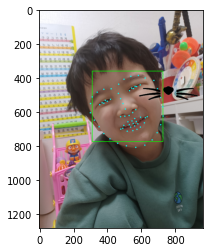

In [24]:
# 스티커 붙었는지 확인
plt.imshow(new_copy_rgb)
plt.show()

(629, 385)
Sticker attached!


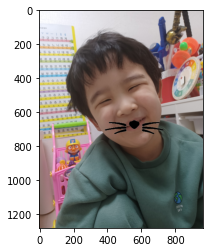

In [25]:
# 얼굴에 갖다 붙이기 재시도 1차
# 좌표 위치 재설정
sec_left_top = (to_be_left_top[0] + 200, to_be_left_top[1] - 200)
print(sec_left_top)
# 스티커 씌우기
sec_copy_rgb = original_rgb.copy()
sec_sticker_area = sec_copy_rgb[sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[0], sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[1]]

sec_copy_rgb[sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[0], sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[1]] = np.where(sticker_resized == 255, sec_sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")

# 스티커 확인
plt.imshow(sec_copy_rgb)
plt.show()

(529, 355)
Sticker attached!


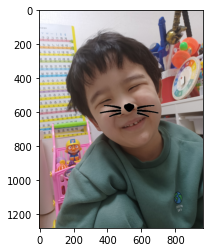

In [26]:
# 얼굴에 갖다 붙이기 재시도 2차
# 좌표 위치 재설정
third_left_top = (sec_left_top[0] - 100, sec_left_top[1] - 30)
print(third_left_top)
# 스티커 씌우기
third_copy_rgb = original_rgb.copy()
third_sticker_area = third_copy_rgb[third_left_top[0]:third_left_top[0]+sticker_resized.shape[0], third_left_top[1]:third_left_top[1]+sticker_resized.shape[1]]

third_copy_rgb[third_left_top[0]:third_left_top[0]+sticker_resized.shape[0], third_left_top[1]:third_left_top[1]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, third_sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")

# 스티커 확인
plt.imshow(third_copy_rgb)
plt.show()

(579, 355)
Sticker attached!


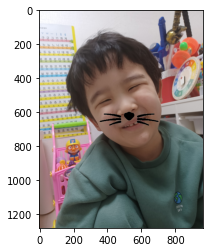

In [27]:
# 얼굴에 갖다 붙이기 재시도 3차
# 좌표 위치 재설정
fourth_left_top = (third_left_top[0] + 50, third_left_top[1])
print(fourth_left_top)
# 스티커 씌우기
fourth_copy_rgb = original_rgb.copy()
fourth_sticker_area = fourth_copy_rgb[fourth_left_top[0]:fourth_left_top[0]+sticker_resized.shape[0], fourth_left_top[1]:fourth_left_top[1]+sticker_resized.shape[1]]

fourth_copy_rgb[fourth_left_top[0]:fourth_left_top[0]+sticker_resized.shape[0], fourth_left_top[1]:fourth_left_top[1]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, fourth_sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")

# 스티커 확인
plt.imshow(fourth_copy_rgb)
plt.show()

In [28]:
# 스티커 이미지 rotation 시도
# 출처 : 구글링...
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

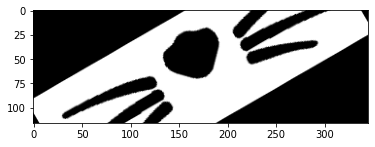

In [29]:
plt.imshow(rotate_image(sticker_resized, 30))
plt.show()

# 실패...

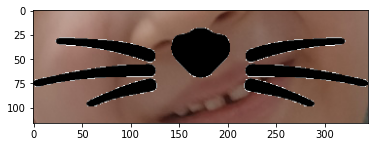

In [30]:
plt.imshow(fourth_sticker_area)
plt.show()

(579, 355)


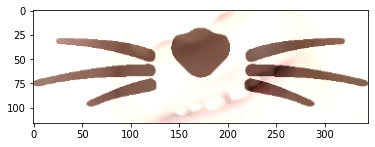

In [31]:
# blending 시도
# cv2.addWeighted() 쓰려면 이미지 사이즈가 같아야 하는 것 같다
# 자문을 구해보니 sticker_area에서만 블렌딩하면 되는 듯
# 그럼 5번째 시도 때는 addWeighted() 함수를 중간에 끼워넣어보자

fifth_left_top = (fourth_left_top[0], fourth_left_top[1])
print(fifth_left_top)

# 스티커 씌우기
fifth_copy_rgb = original_rgb.copy()
fifth_sticker_area = fifth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fifth_left_top[1]+sticker_resized.shape[1]]

test_1 = cv2.addWeighted(fifth_sticker_area, 1, sticker_resized, 0.7, 0)

plt.imshow(test_1)
plt.show()


#### 재시도

>너무 하얘서 blending 다시 시도하얀색을 빼기 위해 gamma 값으로 -255 넣어보기  
gamma 값이 원본 이미지에도 영향을 줄 테니 한 번 원본은 2를 실험으로 곱해 봄

(579, 355)


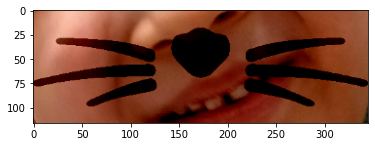

In [32]:
fifth_left_top = (fourth_left_top[0], fourth_left_top[1])
print(fifth_left_top)

# 스티커 씌우기
sixth_copy_rgb = original_rgb.copy()
sixth_sticker_area = sixth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fifth_left_top[1]+sticker_resized.shape[1]]

test_2 = cv2.addWeighted(sixth_sticker_area, 2, sticker_resized, 0.5, -255)

plt.imshow(test_2)
plt.show()


#### 재시도 2차
> 비슷한 것 같은데, 원본 이미지의 색감이 달라졌다.  
원본 이미지에 안 건드리는 쪽으로 해보자 

(579, 355)


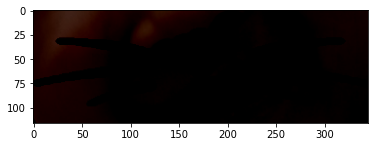

In [33]:


fifth_left_top = (fourth_left_top[0], fourth_left_top[1])
print(fifth_left_top)

# 스티커 씌우기
seventh_copy_rgb = original_rgb.copy()
seventh_sticker_area = seventh_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fifth_left_top[1]+sticker_resized.shape[1]]

test_3 = cv2.addWeighted(seventh_sticker_area, 1, sticker_resized, 0.5, -255) # 하얀색 지워보기 위해 -255, 원본 가중치는 1로

plt.imshow(test_3)
plt.show()


#### 재시도 3차
> 대실패다...  
일단 다시 아까 gamma=-255, 원본 가중치=2로 하고 스티커 가중치를 좀 더 낮춰보자

(579, 355)


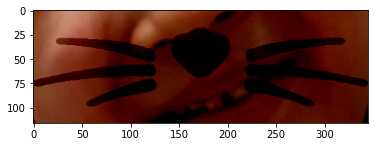

In [34]:
fifth_left_top = (fourth_left_top[0], fourth_left_top[1])
print(fifth_left_top)

# 스티커 씌우기
eighth_copy_rgb = original_rgb.copy()
eighth_sticker_area = eighth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fifth_left_top[1]+sticker_resized.shape[1]]

test_4 = cv2.addWeighted(eighth_sticker_area, 2, sticker_resized, 0.3, -255) # 스티커 가중치 0.3으로 줄여봄

plt.imshow(test_4)
plt.show()

#### 재시도 4차
> 뭔 짓을 해도 그냥 붙이는 것보다 이상하다...  
일단 망친 것보다 볼만한 게 좋으니 다른 사람들이 제안해준 원본, 스티커 가중치를 0.5로 하자...

(579, 355)


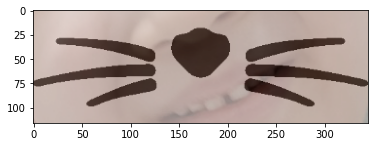

In [35]:
# blending 최종 시도

fifth_left_top = (fourth_left_top[0], fourth_left_top[1])
print(fifth_left_top)

# 스티커 씌우기
tenth_copy_rgb = original_rgb.copy()
tenth_sticker_area = tenth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fifth_left_top[1]+sticker_resized.shape[1]]

blended = cv2.addWeighted(tenth_sticker_area, 0.5, sticker_resized, 0.5, 0)

plt.imshow(blended)
plt.show()

> 그냥 이거 써서 붙여보자

Sticker attached!


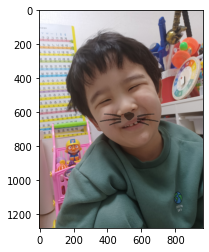

In [36]:
tenth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fourth_left_top[1]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, tenth_sticker_area, blended).astype(np.uint8)
print("Sticker attached!")

# 스티커 확인
plt.imshow(tenth_copy_rgb)
plt.show()

### Step 5. 문제점 찾아보기


> 애초에 얼굴 각도가 기울어진 사진을 썼는데, 한번 정방향스런 사진으로 실험해보자

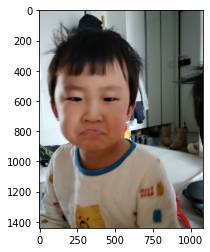

In [37]:
# 다른 사진 불러오기
img_dir = os.getenv("HOME") + '/aiffel/camera_sticker/project_data/sleepy_isaac.png'
raw_bgr = cv2.imread(img_dir)
practice_bgr = raw_bgr.copy()

# converts to rgb
raw_rgb = cv2.cvtColor(raw_bgr, cv2.COLOR_BGR2RGB)
practice_rgb = cv2.cvtColor(raw_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(practice_rgb)
plt.show()

In [38]:
practice_rgb.shape

(1440, 1080, 3)

In [39]:
# detector 선언 및 bounding box 추출
hog_detector = dlib.get_frontal_face_detector()
rectangles = hog_detector(practice_rgb, 1)

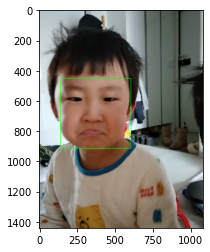

In [40]:
for rect in rectangles:
    l = rect.left()
    t = rect.top()
    r = rect.right()
    b = rect.bottom()
    
    cv2.rectangle(practice_rgb, (l, t), (r, b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

plt.imshow(practice_rgb)
plt.show()

In [41]:
# load landmark model

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

# create landmarks
list_landmarks = []

for rect in rectangles:
    # get landmarks from the bounding box
    points = landmark_predictor(practice_rgb, rect)
    
    # get x, y coordinates from all points and group them in tuples
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks))
print(len(list_landmarks[0])) # note the points are in the inner list


🌫🛸
1
68


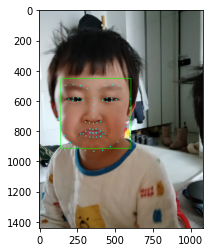

In [42]:
# draw landmarks on the image

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(practice_rgb, point, 1, (0, 255, 255), 5)

plt.imshow(practice_rgb)
plt.show()

In [43]:
# index 51 is chosen for the centre of the sticker
# get x, y coordinates from the image

print('the whole image shape:', practice_rgb.shape)
print('bounding box lt and rb:', rectangles[0])
print('current left top & index 51:', list_landmarks[0][51])

# bounding box width 1/2만큼만 x축 왼쪽으로 보내고
# boudning box height 1/8만큼만 y축 위로 보내면 될듯
for rect, landmark in zip(rectangles, list_landmarks):
    x = landmark[51][0] - rect.width()//2
    y = landmark[51][1] - rect.height()//8

    to_be_left_top = (x, y)

print('to be left top :', to_be_left_top)

the whole image shape: (1440, 1080, 3)
bounding box lt and rb: [(142, 451) (605, 913)]
current left top & index 51: (355, 790)
to be left top : (123, 733)


sticker_resized.shape : (92, 368, 3)


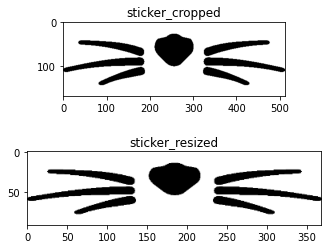

In [44]:
# sticker_cropped으로 생성된 것 다시 확인
plt.subplot(2, 1, 1)
plt.imshow(sticker_cropped)
plt.title('sticker_cropped')

# resize하기
# resize할 width는 bounding box width의 4/5
# resize할 height은 bounding box의 1/5
for rect, landmark in zip(rectangles, list_landmarks):
    w = rect.width()//5 * 4
    h = rect.height()//5 
sticker_resized = cv2.resize(sticker_cropped, (w, h))
print('sticker_resized.shape :', sticker_resized.shape)

plt.subplot(2, 1, 2)
plt.imshow(sticker_resized)
plt.title('sticker_resized')
plt.tight_layout(pad=3.0)
plt.show()

In [45]:
practice_rgb.shape

(1440, 1080, 3)

In [46]:
# 스티커 위치 가능 여부 확인
if practice_rgb.shape[1] > to_be_left_top[0] + sticker_resized.shape[0]:
    print(practice_rgb.shape[1])
    print(to_be_left_top[0] + sticker_resized.shape[0])
    print('x is ok')
else:
    print(practice_rgb.shape[1])
    print(to_be_left_top[0] + sticker_resized.shape[0])
    print('x is not ok')
    
if practice_rgb.shape[0] > to_be_left_top[1] + sticker_resized.shape[1]:
    print(practice_rgb.shape[0])
    print(to_be_left_top[1] + sticker_resized.shape[1])
    print('y is ok')
else:
    print(practice_rgb.shape[0])
    print(to_be_left_top[1] + sticker_resized.shape[1])
    print('y is not ok')
    

1080
215
x is ok
1440
1101
y is ok


Sticker attached!


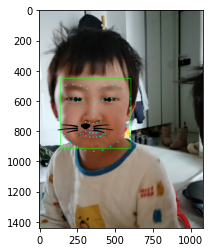

In [47]:
# 스티커 씌우기
sticker_area = practice_rgb[to_be_left_top[1]:to_be_left_top[1]+sticker_resized.shape[0], to_be_left_top[0]:to_be_left_top[0]+sticker_resized.shape[1]]
practice_rgb[to_be_left_top[1]:to_be_left_top[1]+sticker_resized.shape[0], to_be_left_top[0]:to_be_left_top[0]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")

plt.imshow(practice_rgb)
plt.show()

Sticker attached!


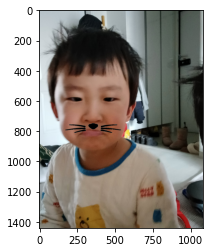

In [48]:
# 콧수염 위치 옮기기
sec_left_top = (to_be_left_top[0] + 50, to_be_left_top[1])
practice_2_rgb = raw_rgb.copy()

# 스티커 씌우기
sticker_area = practice_2_rgb[sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[0], sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[1]]
practice_2_rgb[sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[0], sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, sticker_area, sticker_resized).astype(np.uint8)
print("Sticker attached!")

plt.imshow(practice_2_rgb)
plt.show()

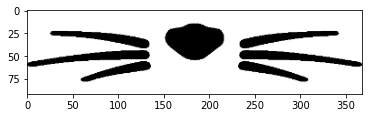

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


In [49]:
# 스티커 사진의 성질 확인
plt.imshow(sticker_resized)
plt.show()
print(sticker_resized[0])

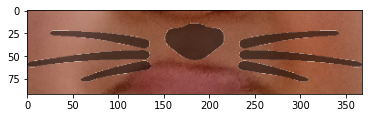

In [50]:
# blending하기
# 카피 만들기
practice_4_rgb = raw_rgb.copy()

# 스티커 부분 슬라이싱
sticker_area = practice_4_rgb[sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[0], sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[1]]

# sticker_resized에서 없애야 하는 값이 255이니,
# np.where()안에서 그렇게 조건을 걸고, 조건이 맞는 배경은 원본, 조건이 아닌 부분은 cv2.addWeighted()을 쓴 블렌딩을 가져다 붙인다.
practice_4_rgb[sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[0], sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[1]] = \
np.where(sticker_resized == 255, sticker_area, cv2.addWeighted(sticker_area, 0.5, sticker_resized, 0.5, 0).astype(np.uint8))

plt.imshow(sticker_area)
plt.show()


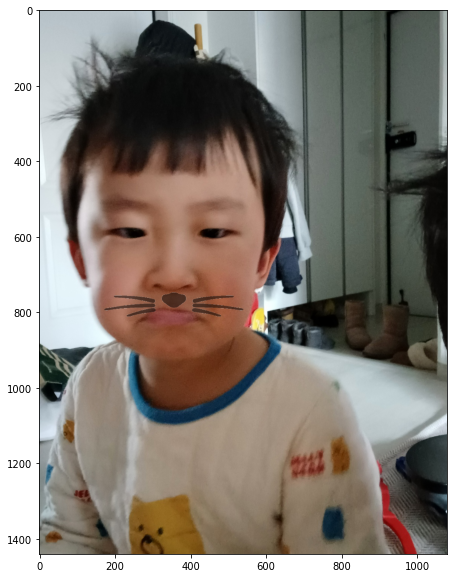

In [51]:
# 이미지 확인
plt.figure(figsize=(8,10))
plt.imshow(practice_4_rgb)
plt.show()

## 회고

- **Point 1)**
> 이미지를 crop해서 쓰게 되면 언제 crop할 지 생각해보는 게 좋겠다.  
그 이유는 회고 2)와 연결된다.

- **Point 2)**
> 애초에 얼굴 각도가 틀어진 것을 하니까 갖다 붙일 이미지의 rotation 문제가 생기게 된다.  
rotate를 해도 그 후 생기는 코너의 빈 공간이 검정색으로 바뀌게 된다.  
=> 처음에 좀 tight하게 crop해서 필요한 부분만 하려다 보니 코너의 빈 공간 처리 문제가 생기게 되는 듯 하다.  
=> 차라리 rotate 후 crop 하는 게 코너의 빈 공간을 쉽게 처리할 수 있지 않을까 싶다.

- **Point 3)**
> 이미지 영역을 슬라이싱할 때 사실 나중에 알았지만 맨처음 실습할 때는 x좌표와 y좌표가 여기저기 섞여있었다.(그래서 제일 첫 콧수염 위치가 이상했다.  
원인은 이미지.shape과 rect에서 좌표 튜플간 x, y를 뜻하는 게 서로 자리가 반대여서 그랬던 것 같은데 앞으로 잘 주의해야겠다.(모르면 써놓고 하자)

- **Point 4)**
> cv2.addWeighted()로 blending하려 할 때 '원본 이미지는 온전히 보전하면서 스티커만 opaque하게 하는 방법을 고민했었다.  
대부분 cv2.addWeighted(원본 , 0.5, 스티커, 0.5, 0)으로 했는데, 이 경우엔 원본 픽셀의 값도 50%로 blending이 되는 것이다.  
물론 그렇게 blending해도 되지만, 내가 애초에 생각했던, cv2.addWeighted(원본, 1, 스티커, 0.5, gamma)로 코딩해서 자연스럽게 나오는 방법은 없을까?  
=> 내가 시도해본 것은 해당 함수가 결국 수학적 수식으로 bledning하려는 것

- **Point 5)**
> 블렌딩에는 여러 방법이 있는 것 같다.  
>1) 블렌딩 영역 슬라이싱 -> np.where()사용 & 그 안에서 블렌딩  
>2) 블렌딩 영역 슬라이싱 -> 2) 블렌딩 -> 3) np.where 함수로 해당 영역에 덮어씌우기  
>3) 블렌딩 영역 슬라이싱 -> 블렌딩 & 그 안에서 np.where() 사용  

아래의 코드는 내가 안 해본 3번 **블렌딩 시 np.where를 사용**하는 코드이다.

```
tenth_copy_rgb[fifth_left_top[0]:fifth_left_top[0]+sticker_resized.shape[0], fifth_left_top[1]:fourth_left_top[1]+sticker_resized.shape[1]] = \ 
cv2.addWeighted(tenth_sticker_area, 0.5, np.where((sticker_resized == 255, tenth_sticker_area, blended).astype(np.uint8), 0.5, 0)
```

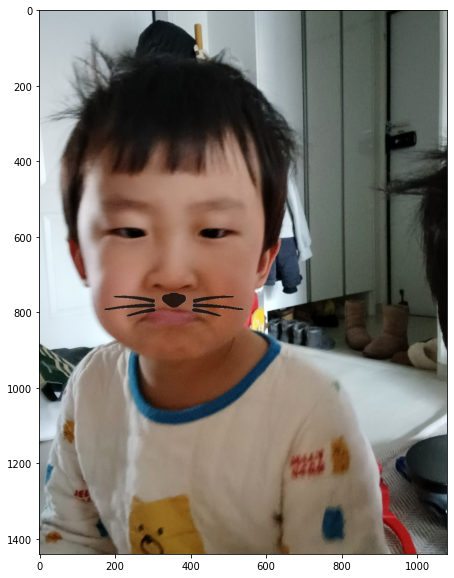

In [52]:
practice_5_rgb = raw_rgb.copy()

# 새로운 방식으로 blending 해보기
practice_5_rgb[sec_left_top[1]:sec_left_top[1]+sticker_resized.shape[0], sec_left_top[0]:sec_left_top[0]+sticker_resized.shape[1]] = \
cv2.addWeighted(sticker_area, 0.5, np.where(sticker_resized == 255, sticker_area, sticker_resized).astype(np.uint8), 0.5, 0)

plt.figure(figsize=(8,10))
plt.imshow(practice_5_rgb)
plt.show()